# Cross-correlation

#Test nº 6

**Synthetic model has inclination equal to $30^o$ and declination equal to $-30^o$. We will test the correlation for both positive and negative intervals for inclination. All correlation coefficients will be calculated between the RTP operator and (i) the gravity anomaly, (ii) the horizontal gradient of gravity anomaly, (iii) the vertical gradient of gravity anomaly.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf, prism_gz
from codes.plot import draw_prism

In [61]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [63]:
model_mag = [-300., 300., -300., 300., 300., 900., 0.65]
model_grav = [-300., 300., -300., 300., 300., 900., 1850.]
area = (model_mag[:4])

incf, decf = 61., 39. # campo
incs, decs = 30., 30. # fonte

In [75]:
tf_free = prism_tf(X, Y, z, model_mag, incf, decf, incs, decs) # total-field anomaly
gz_free = prism_gz(X, Y, z, model_grav) # gravity anomaly

In [76]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [77]:
print 'Free total field anomaly:'
_ = analysis(tf_free, 'nT') # analyzing

Free total field anomaly:
Minimum:    -22.0747 nT
Maximum:    46.0400 nT
Mean value: 0.4802 nT
Variation:  68.1147 nT


In [78]:
tf_noisy = addnoise(tf_free, 0.275, 0.1) # adding noise to all data

In [79]:
print 'Noised total field anomaly:'
_ = analysis(tf_noisy, 'nT')

Noised total field anomaly:
Minimum:    -21.7654 nT
Maximum:    46.2712 nT
Mean value: 0.7552 nT
Variation:  68.0365 nT


In [80]:
print 'Free gravity anomaly:'
_ = analysis(gz_free, 'mGal')

Free gravity anomaly:
Minimum:    0.0754 mGal
Maximum:    5.2496 mGal
Mean value: 0.7211 mGal
Variation:  5.1742 mGal


In [81]:
gz_noisy = addnoise(gz_free, 0.1, 0.01) # adding noise

In [82]:
print 'Noised gravity anomaly:'
_ = analysis(gz_noisy, 'mGal')

Noised gravity anomaly:
Minimum:    0.0230 mGal
Maximum:    5.4161 mGal
Mean value: 0.8213 mGal
Variation:  5.3931 mGal


In [83]:
cmin, cmax = tf_noisy.min(), tf_noisy.max() # for using in magnetic colorbar
gmin, gmax = gz_noisy.min(), gz_noisy.max() # for using in gravity colorbar

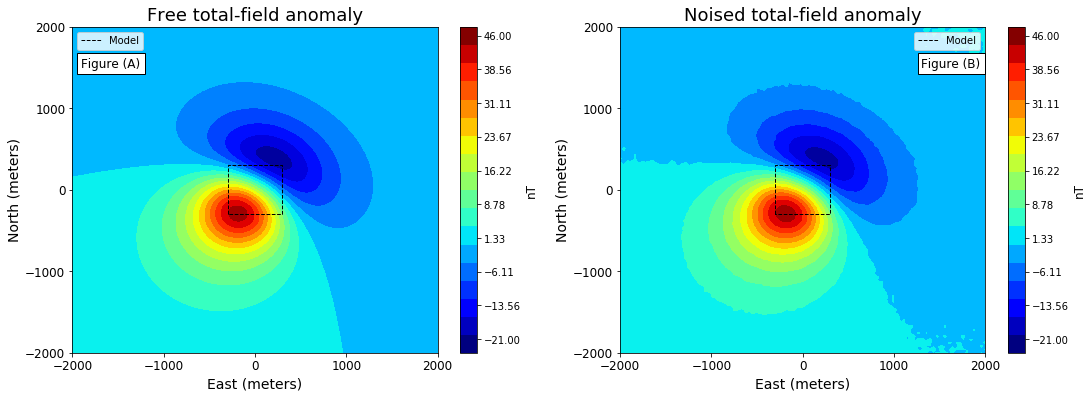

In [84]:
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, tf_free, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_clim(cmin, cmax)
cb.set_ticks(np.linspace(int(cmin), int(cmax), 10))
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(1300., 1500., 'Figure (B)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_clim(cmin, cmax)
cb.set_ticks(np.linspace(int(cmin), int(cmax), 10))
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 1)
#plt.savefig('figs/figure1-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

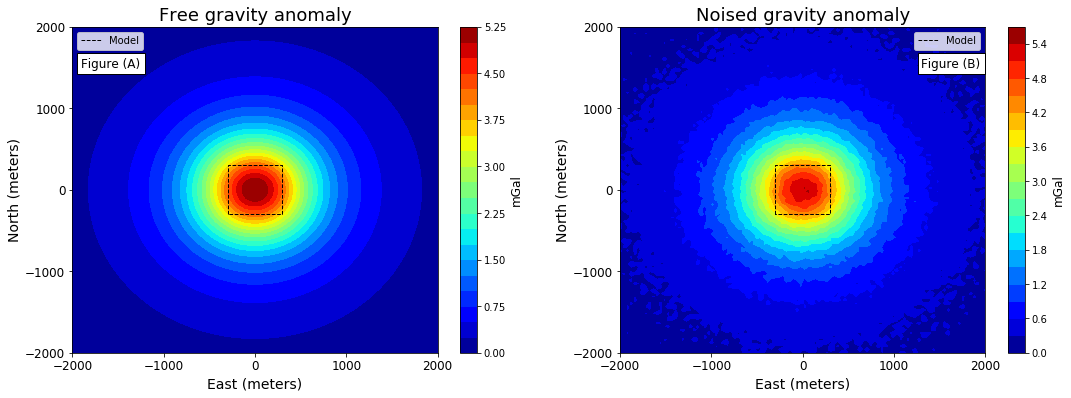

In [85]:
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, gz_free, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free gravity anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
#cb.set_clim(gmin, gmax)
#cb.set_ticks(np.linspace(int(gmin), int(gmax), 10))
cb.set_label('mGal', fontsize = 12)
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
plt.contourf(Y, X, gz_noisy, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(1300., 1500., 'Figure (B)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised gravity anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
#cb.set_clim(gmin, gmax)
#cb.set_ticks(np.linspace(int(gmin), int(gmax), 10))
cb.set_label('mGal', fontsize = 12)
plt.legend(loc = 1)
#plt.savefig('figs/figure1-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [86]:
from codes.statistical import cccoef # correlation coefficient
from codes.filtering import reduction

(A) Applying the correlation between RTP and **free gravity anomaly**.

In [116]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [117]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [118]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, gz_free)

In [119]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, gz_free)

In [120]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.2925
Maximum:    0.9287
Mean value: 0.4782
Variation:  1.2213

Correlacao (inclinacao negativa)
Minimum:    -0.9287
Maximum:    0.2925
Mean value: -0.4794
Variation:  1.2213


In [121]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 30.0
Declination: 29.0

Minima correlacao:
Inclination: 10.0
Declination: -160.0


In [122]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 20.0

Minima correlacao:
Inclination: -30.0
Declination: -151.0


In [123]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: 30.0
True declination: 30.0


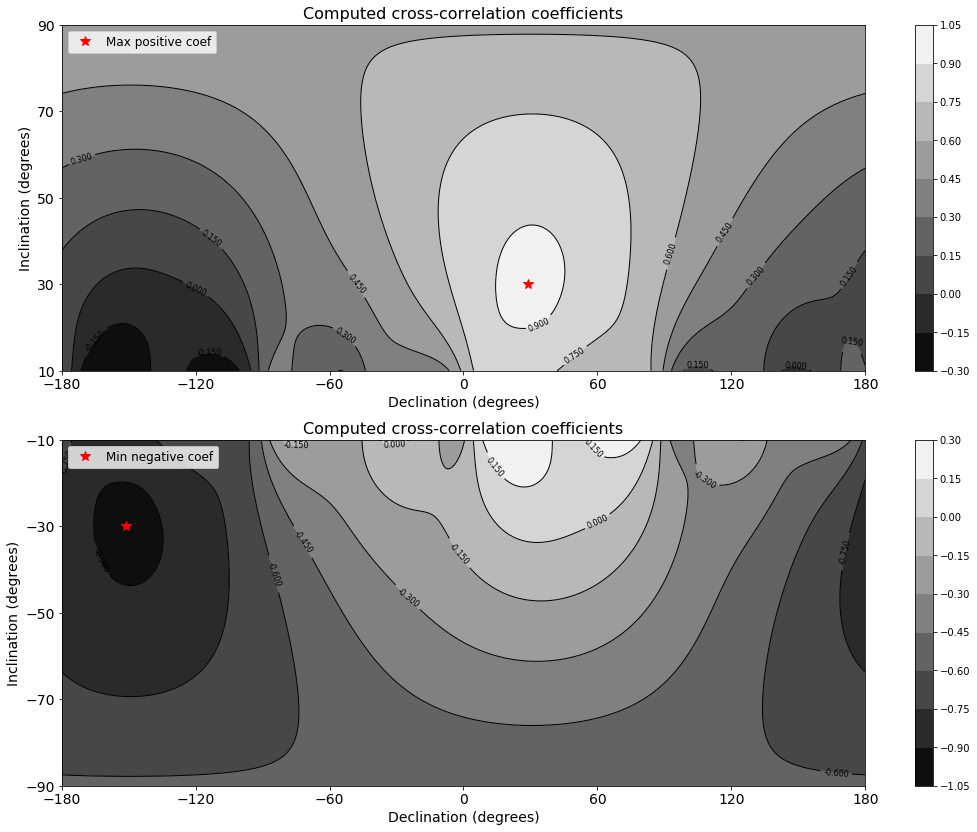

In [124]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(B) Applying the correlation between RTP and **noisy gravity anomaly**.

In [125]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [126]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, gz_noisy)

In [127]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, gz_noisy)

In [128]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.2926
Maximum:    0.9273
Mean value: 0.4775
Variation:  1.2199

Correlacao (inclinacao negativa)
Minimum:    -0.9273
Maximum:    0.2926
Mean value: -0.4787
Variation:  1.2199


In [129]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 30.0
Declination: 29.0

Minima correlacao:
Inclination: 10.0
Declination: -160.0


In [130]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 20.0

Minima correlacao:
Inclination: -30.0
Declination: -151.0


In [131]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: 30.0
True declination: 30.0


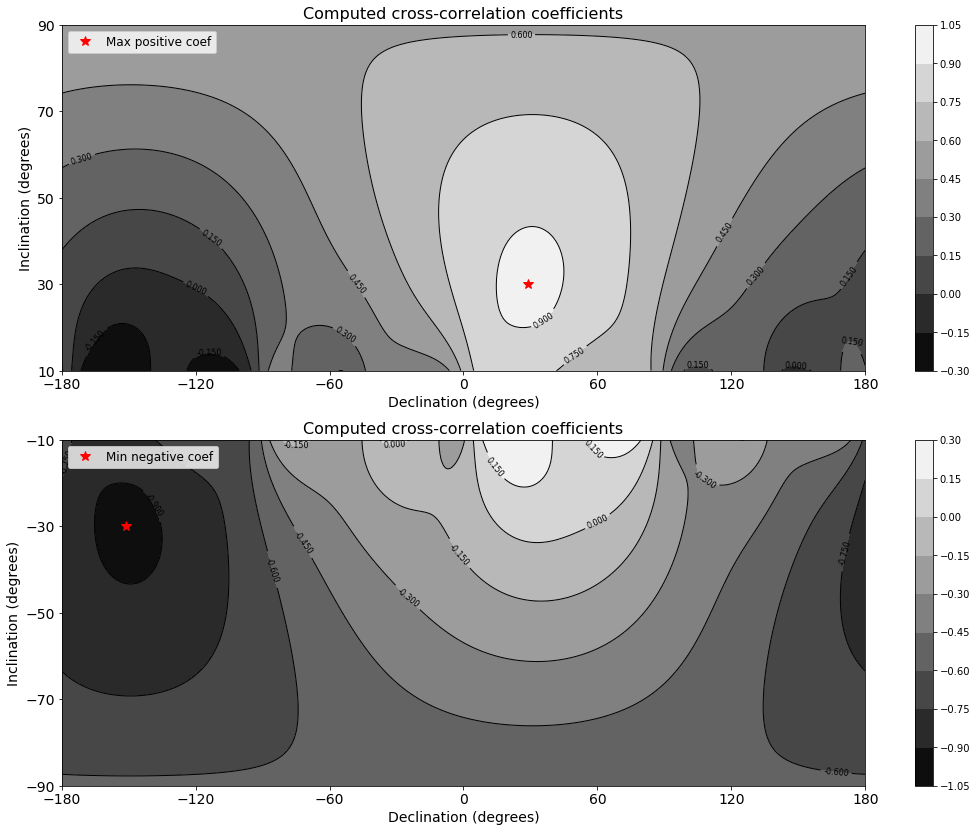

In [132]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(C1) Applying the correlation between the RTP and the **Horizontal Gradient of the free gravity anomaly**.

In [133]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

In [134]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [135]:
from codes.derivative import horzgrad

In [144]:
hga_free = horzgrad(x, y, gz_free) 
hga_noisy = horzgrad(x, y, gz_noisy) 

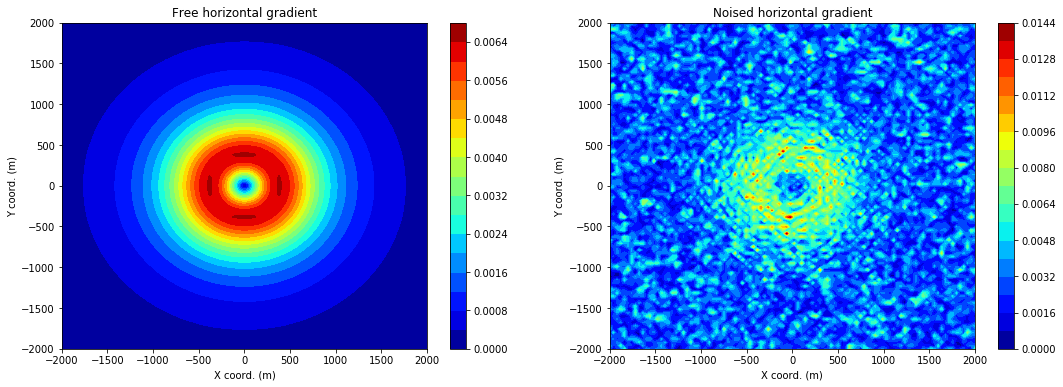

In [145]:
plt.figure(figsize = (18, 6))

plt.subplot(1,2,1)
plt.contourf(X, Y, hga_free, 20, cmap = plt.cm.jet)
plt.title('Free horizontal gradient')
plt.xlabel('X coord. (m)')
plt.ylabel('Y coord. (m)')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(X, Y, hga_noisy, 20, cmap = plt.cm.jet)
plt.title('Noised horizontal gradient')
plt.xlabel('X coord. (m)')
plt.ylabel('Y coord. (m)')
plt.colorbar()

plt.show()

In [146]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, hga_free)

In [147]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, hga_free)

In [149]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.3498
Maximum:    0.7462
Mean value: 0.3694
Variation:  1.0959

Correlacao (inclinacao negativa)
Minimum:    -0.7462
Maximum:    0.3498
Mean value: -0.3704
Variation:  1.0959


In [150]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 31.0
Declination: 29.0

Minima correlacao:
Inclination: 5.0
Declination: -165.0


In [151]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -5.0
Declination: 15.0

Minima correlacao:
Inclination: -31.0
Declination: -151.0


In [152]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: 30.0
True declination: 30.0


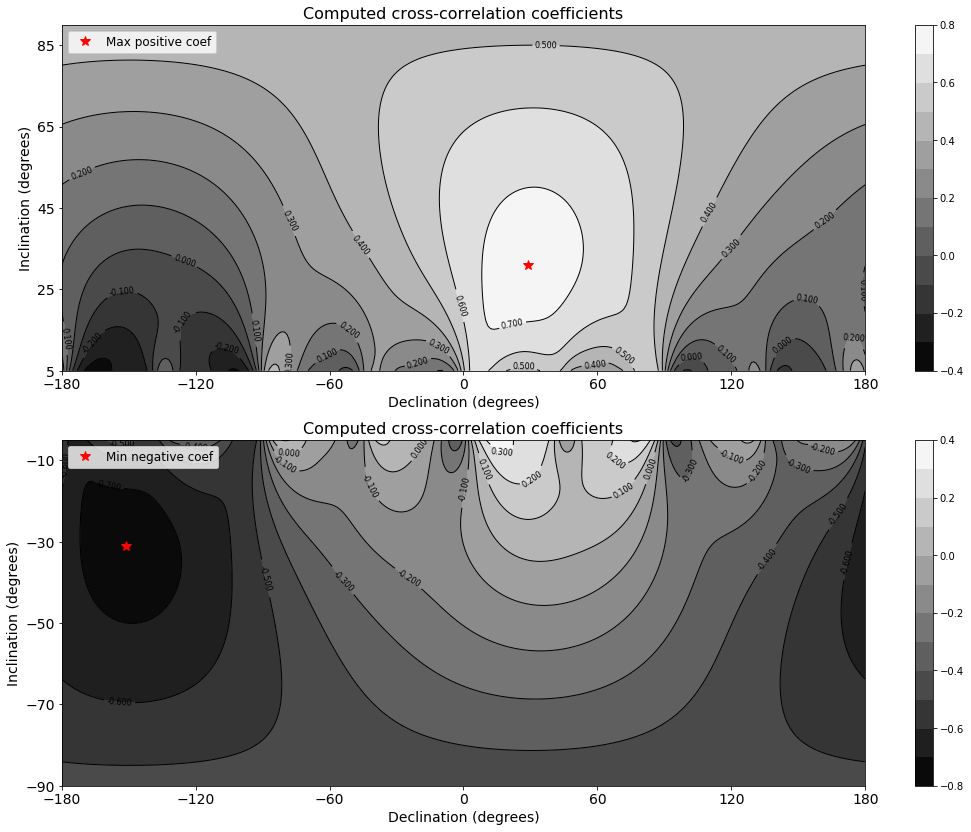

In [153]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(C2) Applying the correlation between the RTP and the **Horizontal Gradient of the noised gravity anomaly**.

In [154]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [155]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [156]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, hga_noisy)

In [157]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, hga_noisy)

In [158]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.1785
Maximum:    0.4015
Mean value: 0.2052
Variation:  0.5800

Correlacao (inclinacao negativa)
Minimum:    -0.4015
Maximum:    0.1785
Mean value: -0.2057
Variation:  0.5800


In [159]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 31.0
Declination: 30.0

Minima correlacao:
Inclination: 5.0
Declination: -165.0


In [160]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -5.0
Declination: 15.0

Minima correlacao:
Inclination: -31.0
Declination: -150.0


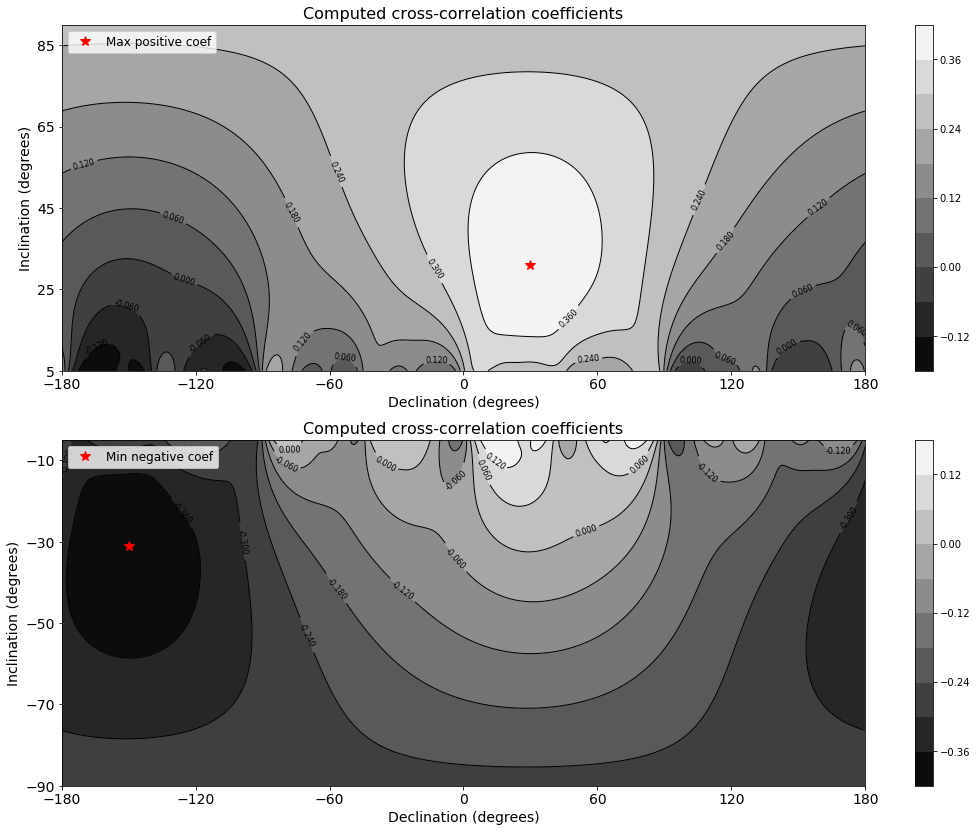

In [161]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(D1) Applying the correlation between the RTP and the **Vertical gradient of the free gravity anomaly**.

In [162]:
from codes.derivative import zderiv

In [165]:
dz_free = zderiv(x, y, gz_free)
dz_noisy = zderiv(x, y, gz_noisy)

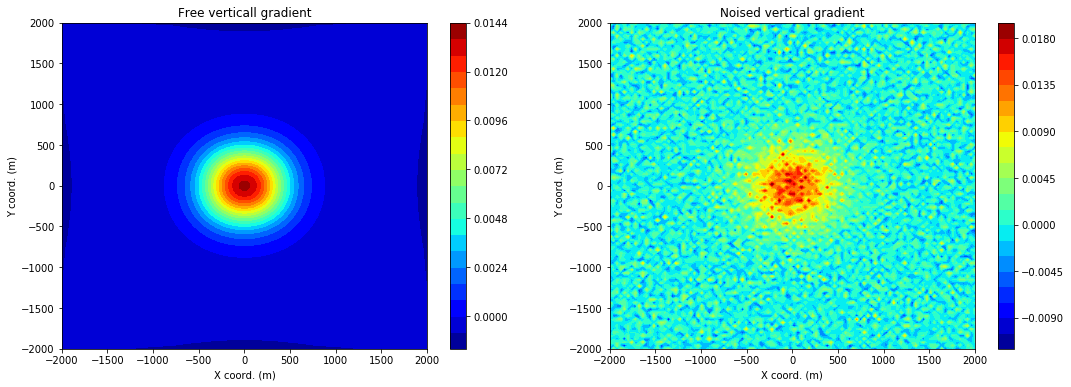

In [166]:
plt.figure(figsize = (18, 6))

plt.subplot(1,2,1)
plt.contourf(X, Y, dz_free, 20, cmap = plt.cm.jet)
plt.title('Free verticall gradient')
plt.xlabel('X coord. (m)')
plt.ylabel('Y coord. (m)')
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(X, Y, dz_noisy, 20, cmap = plt.cm.jet)
plt.title('Noised vertical gradient')
plt.xlabel('X coord. (m)')
plt.ylabel('Y coord. (m)')
plt.colorbar()

plt.show()

In [168]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [169]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [170]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, dz_free)

In [171]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, dz_free)

In [172]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.2697
Maximum:    0.9993
Mean value: 0.5167
Variation:  1.2690

Correlacao (inclinacao negativa)
Minimum:    -0.9993
Maximum:    0.2697
Mean value: -0.5181
Variation:  1.2690


In [173]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 30.0
Declination: 30.0

Minima correlacao:
Inclination: 10.0
Declination: -162.0


In [174]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 18.0

Minima correlacao:
Inclination: -30.0
Declination: -150.0


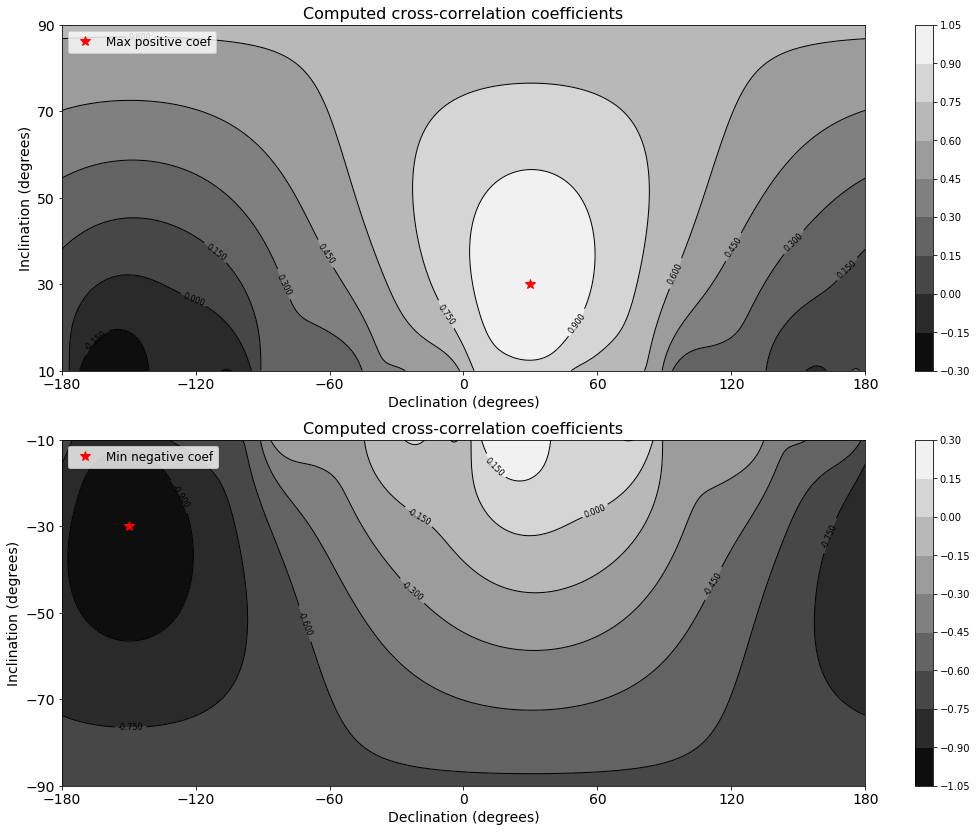

In [177]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(D2) Applying the correlation between the RTP and the **Vertical gradient of the noised gravity anomaly**.

In [178]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [179]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [180]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        res_pos[i,j] = cccoef(rtp_pos, dz_noisy)

In [181]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        res_neg[i,j] = cccoef(rtp_neg, dz_noisy)

In [182]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.1453
Maximum:    0.5379
Mean value: 0.2784
Variation:  0.6833

Correlacao (inclinacao negativa)
Minimum:    -0.5379
Maximum:    0.1453
Mean value: -0.2791
Variation:  0.6833


In [183]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 30.0
Declination: 30.0

Minima correlacao:
Inclination: 10.0
Declination: -162.0


In [184]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 18.0

Minima correlacao:
Inclination: -30.0
Declination: -150.0


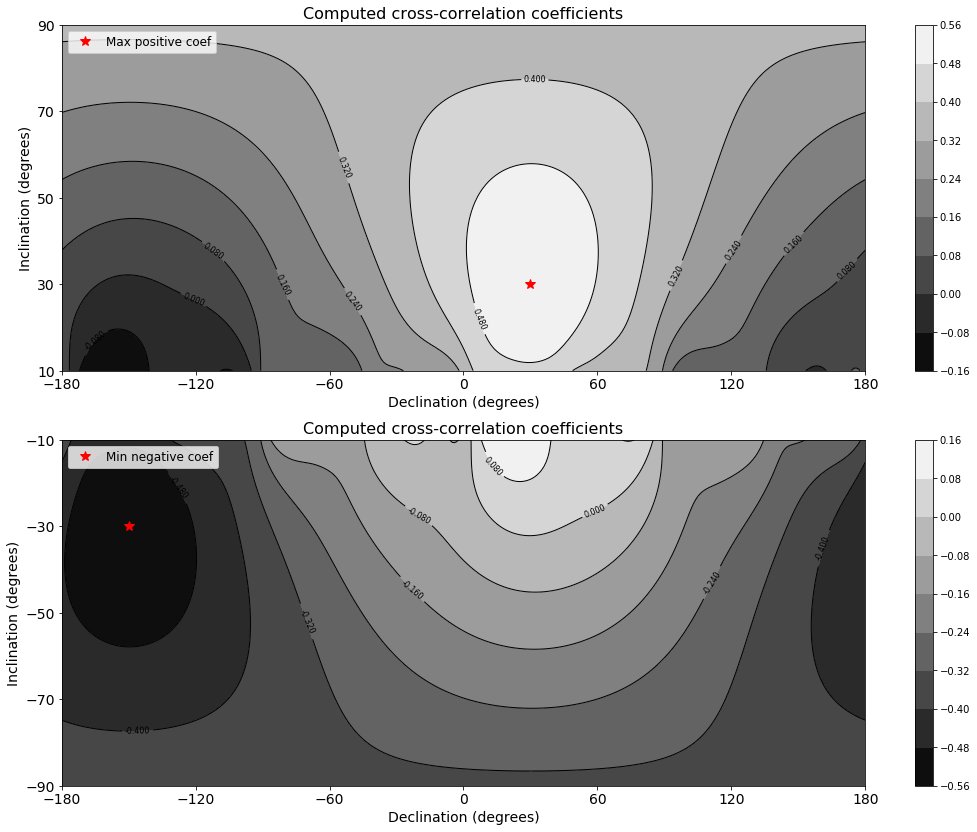

In [185]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()